<div class="alert alert-block alert-info">
<center> <h1> TEXT MINING MDSAA-BA </h1> </center> <br>
<center> <h3> EMOTION DETECTION PROJECT 2021/2022 <h3> </center>

**Group members:** <br>
António Fonseca r20181154 <br>
João Carvalho r20181122 <br>
Lucas Lopes r20181111 <br>
Tiago Sousa r20181077

<!-- <div class="alert alert-block alert-success">
 -->
#### Table of Contents<a id='title'>
    
<!-- </div> -->

* [1) Import](#import)
    * [1.1) Import Libraries](#importlibraries)
    * [1.2) Import the Dataset](#importdataset)
* [2) Oversmapling and Undersampling](#overunder)
    * [2.1) Oversampling](#over)
    * [2.2) Undersampling](#under)
    * [2.3) Train Balanced Dataset](#balanced)
* [3) Preprocessing](#preprocessing)
    * [3.1) Checking the n-grams](#ngram)
    * [3.2) Word importance with TF-IDF](#tfidf)
* [4) Count Vectorizer](#cv)   
    * [4.1) Preprocess Dev dataset](#dev)
* [5) Models](#model) 
    * [5.1) KNN Classifier](#knn)
    * [5.2) Neural Networks](#nn)
    * [5.3) Naive Bayes](#nb)
    * [5.4) SVM/SVC](#svm)
    * [5.5) Gradient Boosting](#gb)
    * [5.6) BERT Model](#bert)
* [6) Test set](#test) 


<a class="anchor" id="import">

## 1) Imports

</a>

  [Back to table of contents](#title)

<a class="anchor" id="importlibraries">

### 1.1) Import libraries

</a>

In [1]:
import pandas as pd
from tqdm import  tqdm
import nltk
import numpy as np
import random

from nltk import ngrams

# Initial Preprocessing
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
import string

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<a class="anchor" id="importdataset">

### 1.2 Import datasets

</a>

In [5]:
train = pd.read_table('data/training_set.txt', delimiter="\t")
dev = pd.read_table('data/dev_set.txt', delimiter="\t")
pd.options.display.max_colwidth = 500

train = pd.DataFrame(data=train)
dev = pd.DataFrame(data=dev)

# display(train.head(3))
# display(dev.head(3))

FileNotFoundError: [Errno 2] No such file or directory: 'data/training_set.txt'

In [12]:
test = pd.read_table('test_results_final2.txt', delimiter="\t")

In [13]:
test

,"Come , let's go get that automobile .",2
0,"Well , some other time , then ?",2
1,He's in trouble . Boy ?,4
2,Criminal gang unit to take control .,4
3,By Molto . No discussion . Interview .,1
4,I was coming down the steps and there was the ...,4
...,...,...
1994,Let's do some good .,2
1995,"Hey , you're looking good .",5
1996,"Have they moved the embassy , or are you hijac...",7
1997,What that !,7


In [3]:
# Label Counter
def label_counter(dataframe, field):
    """
    Function that receives a dataframe and the field whose labels you want to count, and
    returns the amount of examples with those labels in the Pandas dataframe.
    """
    
    count_score = dataframe[field].value_counts()
    
    return count_score


# Word Counter
def word_counter(text_list):
    """
    Function that receives a list of strings and returns the (absolute) frequency of each word in that list of strings.
    """
    words_in_df = ' '.join(text_list).split()
    
    # Count all words 
    freq = pd.Series(words_in_df).value_counts()
    return freq

In [4]:
label_counter(train, "emotion")
#As we can see, the dataset is not balanced (do not focus only on accuracy)

1    2999
2    2129
8    2095
5    1470
4    1442
6    1384
3    1343
7    1138
Name: emotion, dtype: int64

<a class="anchor" id="overunder">

## 2. Oversampling and undersampling

</a>

  [Back to table of contents](#title)

<a class="anchor" id="over">

### 2.1 Oversampling

</a>

In [245]:
#!pip install googletrans==3.1.0a0
from googletrans import Translator

In [246]:
tl = Translator()

def back_translate(string):
    
    language=np.random.choice(['pt','fr','ja','ar'])
    print(language)
    
    
    pt=tl.translate(string, dest=language).text
    eng=tl.translate(pt, dest='en').text
    
    return eng

In [247]:
label_count= {(1): 2999,
             (2): 2129,
             (8): 2095,
             (5): 1470,
             (4): 1442,
             (6): 1384,
             (3): 1343,
             (7): 1138}

label_to_fill={  (1): 0,
                 (2): 0,
                 (8): 0,
                 (5): 530,
                 (4): 558,
                 (6): 616,
                 (3): 657,
                 (7): 862}

In [248]:
for label, count in label_to_fill.items():

    array=train['emotion']==label
    array=array.values

    sample=train.iloc[array].index.values

    chosen=np.random.choice(sample, size=count, replace=False)

    for extra in chosen:

        original= train.iloc[extra]['sentence']

        new=back_translate(original)

        current_index=train.shape[0]+1

        print(new,label)
        train.loc[current_index]=np.array([new, label])
    
        print(current_index)  

In [249]:
train.to_csv('data/train_oversample.csv')

<a class="anchor" id="under">

### 2.2) Undersampling

</a>

In [250]:
train_over = pd.read_csv('data/train_oversample.csv')[['sentence','emotion']]
train_over

In [251]:
# ! pip install imbalanced-learn
import imblearn
from imblearn.under_sampling import RandomUnderSampler

desired_under={}

desired_under[1]=2000
desired_under[2]=2000
desired_under[3]=2000
desired_under[4]=2000
desired_under[5]=2000
desired_under[6]=2000
desired_under[7]=2000
desired_under[8]=2000

undersample = RandomUnderSampler(sampling_strategy=desired_under)

In [252]:
labels=train_over['emotion']
train_u, labels_u = undersample.fit_resample(train_over, labels)
label_counter(train_u, "emotion")

In [254]:
train_u.to_csv('data/train_balanced.csv')

<a class="anchor" id="balanced">

### 2.3) Train Balanced Dataset

</a>

In [5]:
train_balanced = pd.read_csv('data/training_set_balanced.csv')[['sentence','emotion']]

In [6]:
label_counter(train_balanced, "emotion")

1    2000
2    2000
3    2000
4    2000
5    2000
6    2000
7    2000
8    2000
Name: emotion, dtype: int64

In [7]:
train_balanced['sentence'].value_counts()

All ?                                        3
I miss you too .                             2
Some days I wake up --                       2
This is a mistake .                          2
Oh , she did !                               2
                                            ..
Might as well be a hundred.                  1
I regret your aggressiveness , [PERSON] .    1
Your word to a breechclouted savage ?        1
I will be forced to shoot you again.         1
That's pretty important , all that .         1
Name: sentence, Length: 15890, dtype: int64

In [8]:
word_counter(list(train_balanced['sentence']))[:15]
# a lot os stopwords here --> let´s try to take some of this out

.           9953
,           5297
you         3846
I           3786
to          3195
the         3049
a           2721
?           2541
of          1512
!           1476
and         1427
[PERSON]    1393
that        1260
in          1225
it          1218
dtype: int64

<a class="anchor" id="Preprocessing">

## 3) Preprocessing

</a>

  [Back to table of contents](#title)

In [9]:
stop = set(stopwords.words('english'))  # 179 stop words
# print(stop)

exclude = set(string.punctuation)  # 32 punctuation
# print(exclude)

lemma = WordNetLemmatizer()
snowball_stemmer = SnowballStemmer('english')

In [10]:
import re

def clean(text_list, remove_stop=False, lemmatize, stemmer):
    """
    Function that a receives a list of strings and preprocesses it:
    
    :param text_list: List of strings.
    :param lemmatize: Tag to apply lemmatization if True.
    :param stemmer: Tag to apply the stemmer if True.
    """
    
    updates = []
    for j in tqdm(range(len(text_list))):
        
        text = text_list[j]
        
        # LOWERCASE TEXT
        text = text.lower()
        
        # REMOVE NUMERICAL DATA AND PUNCTUATION --> EVERYTHING EXCEPT LETTERS
        text = re.sub("[^a-z!?']", ' ', text)  # ^a-z!?'
        
        # REMOVE STOP WORDS
        if remove_stop:
            text = ' '.join([word for word in text.split() if word not in stop])
        
        # REMOVE HTML TAGS
        text = BeautifulSoup(text).get_text()
    
        
        if lemmatize:
            text = " ".join(lemma.lemmatize(word) for word in text.split())
            #text = [lem.lemmatize(word) for word in text if not word in stop_words] ?????????????????????????????????????

        
        if stemmer:
            text = " ".join(snowball_stemmer.stem(word) for word in text.split())
            
        # REMOVE EMPTY SPACES
        text =  ' '.join(text.split())
        
        updates.append(text)
        
    return updates


def update_df(dataframe, list_updated):
    dataframe.update(pd.DataFrame({"sentence": list_updated}))

In [11]:
clean_df = train_balanced.copy()

updates = clean(clean_df["sentence"], remove_stop = False, lemmatize = False, stemmer = False)
update_df(clean_df, updates)

100%|██████████████████████████████████████████████████████████████████████████| 16000/16000 [00:03<00:00, 4072.45it/s]


In [13]:
clean_df.head(3)

,sentence,emotion
0,end of the line asshole,1
1,wait ! wait right here !,1
2,who the hell asked you anyways huh ? shut up !,1


In [14]:
# check again the most frequent words
word_counter(updates)[:15]

you       4997
i         3825
the       3446
to        3240
a         2871
?         2575
and       1803
person    1659
it        1588
of        1548
!         1493
that      1432
me        1279
in        1278
is        1260
dtype: int64

<a class="anchor" id="ngram">

### 3.1) Checking the n-grams

</a>

In [15]:
def get_top_n_grams(corpus, top_k, n):
    """
    Function that a receives a list of strings and preprocesses it:
        
    :param corpus: list of strings
    :param top_k: int with the number of n-grams that we want to extract
    :param n: n gram type to be considered 
             (if n=1 extracts unigrams, if n=2 extracts bigrams, ...)
             
    :return: Returns a sorted dataframe in which the first column 
        contains the extracted ngrams and the second column contains
        the respective counts
    """
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = []
    for word, idx in vec.vocabulary_.items():
        words_freq.append((word, sum_words[0, idx]))
        
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_df = pd.DataFrame(words_freq[:top_k])
    top_df.columns = ["Ngram", "Freq"]
    
    return top_df


def plot_frequencies(top_df):
    """
    Function that receives a dataframe from the "get_top_n_grams" function
    and plots the frequencies in a bar plot.
    """
    x_labels = top_df["Ngram"][:30]
    y_pos = np.arange(len(x_labels))
    values = top_df["Freq"][:30]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, x_labels)
    plt.ylabel('Frequencies')
    plt.title('Words')
    plt.xticks(rotation=90)
    plt.show()

In [16]:
top_df = get_top_n_grams(updates, top_k=20, n=2)
top_df.head(10)

,Ngram,Freq
0,you re,531
1,in the,299
2,are you,278
3,do you,259
4,you know,235
5,want to,229
6,this is,218
7,to be,213
8,of the,189
9,we re,179


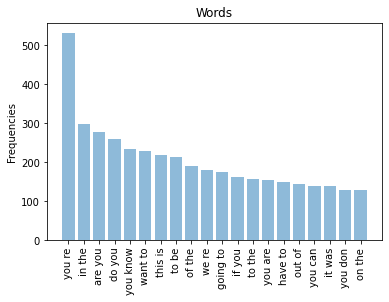

In [17]:
top_df = get_top_n_grams(updates, top_k=20, n=2)
plot_frequencies(top_df)

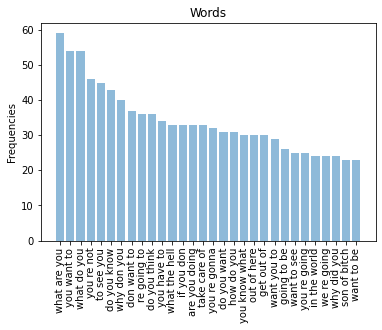

In [18]:
top_df = get_top_n_grams(updates, top_k=40, n=3)
plot_frequencies(top_df)

<a class="anchor" id="tfidf">

### 3.2) Word importance with TF-IDF

</a>

In [19]:
def words_importance(train, updates, n_gram):
    
    # only words whose frequency is below 0.8 are considered, and we're obtaining binary vectors rather than counts
    cv = CountVectorizer(
        max_df=0.8,
        binary=True,
        ngram_range=(n_gram,n_gram)  # This parameter forces CountVectorizer to create unigram, bigram, and trigram features
    )

    # cv.fit and cv.transform --> to the train
    X = cv.fit_transform(train["sentence"])
    print(X.shape)
  
    tfidf_vectorizer = TfidfTransformer().fit(X)
    
    feature_names = cv.get_feature_names()
    
    # Create empty list to store the values
    important_grams = []
    
    for doc in train["sentence"].values: 
        
        # transform that line to a bigram and see the tfid of each one
        tf_idf_vector = tfidf_vectorizer.transform(cv.transform([doc]))  
        
        tfidf_scores = extract_feature_scores(feature_names, tf_idf_vector.toarray())

        for line in tfidf_scores:
            if line[1] > 0.40:
                important_grams.append(line[0])
                
    return set(important_grams)


In [270]:
important_unigrams = words_importance(train_balanced, updates, 1)
print(len(important_unigrams))

#(16000, 7465)
#6634

In [271]:
important_bigrams = words_importance(train_balanced, updates, 2)
print(len(important_bigrams))

#(16000, 41530)
#21656

In [272]:
important_trigrams = words_importance(train_balanced, updates, 3)
print(len(important_trigrams))

#(16000, 62631)
#27247

In [274]:
important_words = list(important_unigrams) + list(important_bigrams) + list(important_trigrams)
print(len(important_words))
important_words[-1]

In [275]:
# remove the spaces between the bigrams and the trigrams 
def remove_spaces(text):
    text=text.replace(' ','')
    return text

for i in range(len(important_words)):
    important_words[i]=remove_spaces(important_words[i])

In [21]:
## In order to avoid running this every time we open our project, we extracted this list into a txt file
# with open("important_words.txt", "w") as output:
#     output.write(str(important_words))

In [23]:
my_file = open("important_words.txt", "r")
  
# reading the file
data = my_file.read()

data = data.replace('[\'', '')
important_words = data.replace('\']', '').split("\', \'")
important_words[-1]

'couldeversay'

In [24]:
def get_ngrams(text, n=2):
    
    value = ''
    
    bigrams = ngrams(text.split(), n)
    
    for bigram in bigrams:
        # print(bigram)
        gram = ''.join(word for word in bigram)
        # print(a)
        
        value = value + gram + ' '
    # print(value)
    
    return value  

def remove_extra_spaces (mystring):
    return ' '.join(mystring.split())

def bi_tri_grams (df):
    
    df['unigrams'] = df['sentence'].apply(lambda x: remove_extra_spaces(x))

    df['bigrams'] = df['sentence'].apply(lambda x: get_ngrams(x,2))

    df['trigrams'] = df['sentence'].apply(lambda x: get_ngrams(x,3))
    
    df["sentence"] = df[['unigrams', 'bigrams','trigrams']].agg(' '.join, axis=1)
    
    return df

def filter_important_words (mystring):
    
    words=mystring.split()
    for word in words:
        if word not in important_words:
            mystring=mystring.replace(word,'')
            
    return mystring

In [279]:
train_preprocessed = bi_tri_grams(train_balanced)

train_preprocessed['sentence'] = train_preprocessed['sentence'].apply(lambda x: filter_important_words(x) )

In [280]:
train_preprocessed.to_csv('data/train_preprocessed.csv')

In [29]:
train_preprocessed = pd.read_csv('data/train_preprocessed.csv')
# train_preprocessed.head()

<a class="anchor" id="cv">

## 4) Count Vectorizer

</a>

  [Back to table of contents](#title)

#### 1. Unigrams (with stop words)

In [25]:
cv_1 = CountVectorizer(
    max_df=0.9,
    binary=True,
    ngram_range=(1,1)  
)

# cv.fit and cv.transform --> to the train
X_1 = cv_1.fit_transform(train_balanced["sentence"])
print(X_1.shape)

(16000, 7486)


#### 2. Unigrams & Bigrams (with stop words)

In [26]:
cv_2 = CountVectorizer(
    max_df=0.9,
    binary=True,
    ngram_range=(1,2)  
)

# cv.fit and cv.transform --> to the train
X_2 = cv_2.fit_transform(train_balanced["sentence"])
print(X_2.shape)

(16000, 49064)


#### 3. Unigrams, Bigrams & Trigrams (with stop words) - (with and without TFIDF analysis)

In [27]:
cv_3 = CountVectorizer(
    max_df=0.9,
    binary=True,
    ngram_range=(1,3)  
)

# cv.fit and cv.transform --> to the train
X_3 = cv_3.fit_transform(train_balanced["sentence"])
print(X_3.shape)

(16000, 111740)


In [30]:
cv_3_1 = CountVectorizer(
    max_df=0.9,
    binary=True,
    ngram_range=(1,1)  
)

# cv.fit and cv.transform --> to the train
X_3_1 = cv_3_1.fit_transform(train_preprocessed["sentence"])  # dataset with the TF-IDF analysis
print(X_3_1.shape)

(16000, 63965)


#### 4. Bigrams (with stop words)

In [31]:
cv_4 = CountVectorizer(
    max_df=0.9,
    binary=True,
    ngram_range=(2,2)  
)

# cv.fit and cv.transform --> to the train
X_4 = cv_4.fit_transform(train_balanced["sentence"])
print(X_4.shape)

(16000, 41578)


#### 5. Bigrams & Trigrams (with stop words)

In [32]:
cv_5 = CountVectorizer(
    max_df=0.9,
    binary=True,
    ngram_range=(2,3)  
)

# cv.fit and cv.transform --> to the train
X_5 = cv_5.fit_transform(train_balanced["sentence"])
print(X_5.shape)

(16000, 104254)


<a class="anchor" id="dev">

### 4.1) Preprocess Dev dataset

</a>

In [288]:
updates_dev = clean(dev["sentence"], lemmatize = False, stemmer = False)
update_df(dev, updates_dev)

dev_preprocessed=bi_tri_grams (dev)

dev_preprocessed['sentence'] = dev_preprocessed['sentence'].apply(lambda x: filter_important_words(x) )

In [289]:
dev_preprocessed.to_csv('data/dev_preprocessed.csv')

In [301]:
updates_dev = clean(dev["sentence"], remove_stop=False, lemmatize = False, stemmer = False)
update_df(dev, updates_dev)

dev.head(3)

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 11904.98it/s]


,sentence,emotion
0,what happens to the gold in our safe ?,4
1,natural to get cold feet,8
2,not very lucky is he ?,7


<a class="anchor" id="models">

## 5) Models

</a>

  [Back to table of contents](#title)

In [33]:
def cv_vector(cv, train_set=train_balanced, dev_set=dev):
    
    # apply count vectorizer to the train dataset
    X_train = cv.fit_transform(train_set["sentence"])
    y_train = np.array(train_set["emotion"])

    # apply count vectorizer to the dev dataset
    X_dev = cv.transform(dev_set["sentence"])
    y_dev = np.array(dev_set["emotion"])

    print(X_train.shape, y_train.shape)
    print(X_dev.shape, y_dev.shape)
    
    return X_train, y_train, X_dev, y_dev


# Function to create confusion matrix
def plot_cm(confusion_matrix : np.array, 
            classnames : list):
    """
    Function that creates a confusion matrix plot using the Wikipedia convention for the axis. 
    :param confusion_matrix: confusion matrix that will be plotted
    :param classnames: labels of the classes
    
    Returns:
        - Plot of the Confusion Matrix
    """
    
    confusionmatrix = confusion_matrix
    class_names = classnames             

    fig, ax = plt.subplots()
    im = plt.imshow(confusionmatrix, cmap='cividis_r')
    plt.colorbar()

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, confusionmatrix[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Confusion Matrix")
    plt.xlabel('Targets')
    plt.ylabel('Predictions')
    plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged
    plt.ylim(bottom=-0.5)  # adjust the bottom leaving top unchanged
    
    return plt.show()


################################################################################################
labels = {"Anger": 1, "Anticipation": 2, "Disgust": 3, "Fear": 4, "Joy": 5, "Sadness": 6, "Surprise": 7, "Trust": 8}


<a class="anchor" id="knn">

### 5.1) KNN Classifier

</a>

In [238]:
# ########## GRID SEARCH ##########
# model_KNN = KNeighborsClassifier()

# param_KNN = {
#     'n_neighbors':[7,9],
#     'weights': ['uniform', 'distance'],
#     'algorithm' : ['auto', 'brute'], #'brute', 'ball_tree'], 
#     'leaf_size':[10,30],
#     'p' : [1,2],
#     'metric' : ['euclidean'], #, 'manhattan', 'minkowski'], #'mahalanobis'],
#     'metric_params' : [None],
# #     'n_jobs' : [None, -1]
# }

# model_grid = GridSearchCV(estimator = model_KNN, param_grid = param_KNN, scoring='accuracy', n_jobs=-1, cv=2)

# grid_search = model_grid.fit(X_train, y_train)

# print(f'Best parameters = {grid_search.best_params_}')
# print(f'Best score = {grid_search.best_score_}')

In [150]:
# clean_df = train_balanced.copy()

# updates = clean(clean_df["sentence"], remove_stop = False, lemmatize = False, stemmer = False)
# update_df(clean_df, updates)

# # Change the propreccesing part !!
# X_train, y_train, X_dev, y_dev = cv_vector(cv_2, clean_df, dev)

# # Clustering the reviews with a KNN classifier --> TUNE THE PARAMETERES
# modelknn = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='brute', leaf_size=30, p=2,
#                                          metric='cosine', metric_params=None, n_jobs=1)  # 51


# # fit the model to the train dataset
# modelknn.fit(X_train,y_train)

# # predict the labels
# knn_predicted = modelknn.predict(X_dev)

# # classification report
# labels = {"Anger": 1, "Anticipation": 2, "Disgust": 3, "Fear": 4, "Joy": 5, "Sadness": 6, "Surprise": 7, "Trust": 8}
# print (classification_report(knn_predicted, y_dev, target_names=labels.keys()))

100%|██████████████████████████████████████████████████████████████████████████| 16000/16000 [00:01<00:00, 9291.53it/s]


(16000, 33499) (16000,)
(1000, 33499) (1000,)
              precision    recall  f1-score   support

       Anger       0.24      0.32      0.27       161
Anticipation       0.22      0.27      0.24       141
     Disgust       0.17      0.26      0.20        50
        Fear       0.20      0.20      0.20       107
         Joy       0.30      0.26      0.28       111
     Sadness       0.30      0.13      0.18       204
    Surprise       0.27      0.17      0.21       151
       Trust       0.14      0.29      0.19        75

    accuracy                           0.23      1000
   macro avg       0.23      0.24      0.22      1000
weighted avg       0.25      0.23      0.22      1000



In [ ]:
# # display(confusion_matrix(knn_predicted, y_dev))
# plot_cm(confusion_matrix(knn_predicted, y_dev), labels.keys())

<a class="anchor" id="nn">

### 5.2) Neural Network 

</a>

In [ ]:
# clean_df = train_balanced.copy()

# updates = clean(clean_df["sentence"], remove_stop = False, lemmatize = True, stemmer = False)
# update_df(clean_df, updates)

# # Change the propreccesing part !!
# X_train, y_train, X_dev, y_dev = cv_vector(cv_2, clean_df, dev)

# # Model creation
# neural_network = MLPClassifier(
    
#     hidden_layer_sizes=(100),
#     activation='relu',
#     solver='adam',
#     alpha=0.01,
#     batch_size='auto',
#     learning_rate='constant',
#     learning_rate_init=0.001,
# )

# # fit the model to the train dataset
# neural_network.fit(X_train,y_train)

# # predict the labels
# nn_predicted = neural_network.predict(X_dev)

# # classification report
# print (classification_report(nn_predicted, y_dev, target_names=labels.keys()))

100%|██████████████████████████████████████████████████████████████████████████| 16000/16000 [00:01<00:00, 9211.41it/s]


(16000, 47442) (16000,)
(1000, 47442) (1000,)


array([[70, 26, 13, 16,  6,  9, 13, 18],
       [22, 60,  9,  6,  9,  8, 11, 23],
       [19,  6, 20,  5,  4,  8,  9, 10],
       [20, 14,  3, 35,  4, 13, 12,  7],
       [ 3, 16,  3,  5, 39,  9,  7, 18],
       [24, 12,  9, 12,  8, 24,  8, 13],
       [29, 13,  9,  9,  6,  7, 29, 10],
       [24, 23, 11, 16, 21,  9,  7, 59]], dtype=int64)

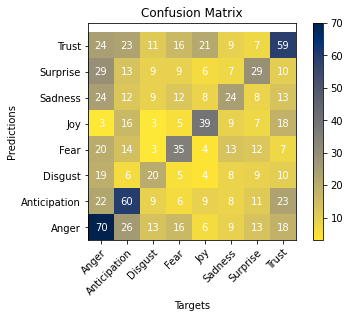

In [240]:
# display(confusion_matrix(nn_predicted, y_dev))

# plot_cm(confusion_matrix(nn_predicted, y_dev), labels.keys())

<a class="anchor" id="nb">

### 5.3) Naive Bayes

</a>

In [166]:
# clean_df = train_balanced.copy()

# updates = clean(clean_df["sentence"], remove_stop = False, lemmatize = False, stemmer = False)
# update_df(clean_df, updates)

# # Change the propreccesing part !!
# X_train, y_train, X_dev, y_dev = cv_vector(cv_2, clean_df, dev)

# ModelNB = MultinomialNB(alpha=0.5)


# # fit the model to the train dataset
# ModelNB.fit(X_train,y_train)

# # predict the labels
# bayes_predicted = ModelNB.predict(X_dev)

# # classification report
# print (classification_report(bayes_predicted, y_dev, target_names=labels.keys()))

100%|█████████████████████████████████████████████████████████████████████████| 16000/16000 [00:00<00:00, 16194.41it/s]


(16000, 63965) (16000,)
(1000, 63965) (1000,)
              precision    recall  f1-score   support

       Anger       0.29      0.39      0.34       157
Anticipation       0.34      0.39      0.37       147
     Disgust       0.26      0.18      0.21       110
        Fear       0.38      0.31      0.34       124
         Joy       0.37      0.46      0.41        79
     Sadness       0.33      0.26      0.29       113
    Surprise       0.27      0.22      0.24       117
       Trust       0.36      0.37      0.37       153

    accuracy                           0.33      1000
   macro avg       0.33      0.32      0.32      1000
weighted avg       0.33      0.33      0.32      1000



In [ ]:
# # display(confusion_matrix(bayes_predicted, y_dev))
# plot_cm(confusion_matrix(bayes_predicted, y_dev), labels.keys())

<a class="anchor" id="svm">

### 5.4) SVM/SVC

</a>

In [93]:
# # Change the propreccesing part !!
# X_train, y_train, X_dev, y_dev = cv_vector(cv_2, train_balanced, dev)

# # ########## GRID SEARCH ##########
# ModelSVM = svm.SVC()
    
# param_grid = {'C': [0.1,1, 10], 
#               'gamma': [1,0.1,0.01],
#               'kernel': ['rbf', 'poly', 'sigmoid']}


# model_grid = GridSearchCV(estimator = ModelSVM, param_grid = param_grid, scoring='accuracy', n_jobs=-1, cv=2)

# grid_search = model_grid.fit(X_train, y_train)

# print(f'Best parameters = {grid_search.best_params_}')
# print(f'Best score = {grid_search.best_score_}')

In [158]:
# clean_df = train_balanced.copy()

# updates = clean(clean_df["sentence"], remove_stop = False, lemmatize = False, stemmer = False)
# update_df(clean_df, updates)

# # Change the propreccesing part !!
# X_train, y_train, X_dev, y_dev = cv_vector(cv_2, clean_df, dev)

# # ModelSVM = svm.SVC(C=10, kernel='linear', degree=3, gamma=0.01) # rbf
# ModelSVM = svm.SVC(kernel='linear') # rbf


# # fit the model to the train dataset
# ModelSVM.fit(X_train,y_train)

# # predict the labels
# svm_predicted = ModelSVM.predict(X_dev)

# # classification report
# print (classification_report(svm_predicted, y_dev, target_names=labels.keys()))

100%|██████████████████████████████████████████████████████████████████████████| 16000/16000 [00:01<00:00, 8072.66it/s]


(16000, 33497) (16000,)
(1000, 33497) (1000,)
              precision    recall  f1-score   support

       Anger       0.31      0.43      0.36       151
Anticipation       0.28      0.37      0.32       127
     Disgust       0.18      0.26      0.21        54
        Fear       0.22      0.27      0.24        84
         Joy       0.41      0.37      0.39       108
     Sadness       0.08      0.13      0.10        52
    Surprise       0.58      0.18      0.27       315
       Trust       0.25      0.36      0.29       109

    accuracy                           0.29      1000
   macro avg       0.29      0.30      0.27      1000
weighted avg       0.37      0.29      0.29      1000



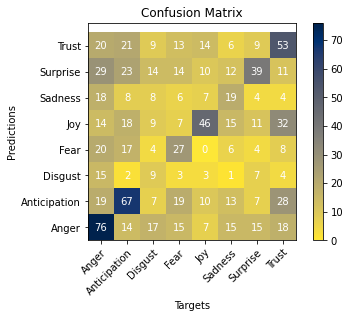

In [100]:
# # display(confusion_matrix(bayes_predicted, y_dev))
# plot_cm(confusion_matrix(svm_predicted, y_dev), labels.keys())

In [ ]:
# # apply count vectorizer to the dev dataset
# val = cv.transform(dev_preprocessed["sentence"])

# # predict the labels of the dev dataset
# predict = ModelSVM.predict(val)

# svm_predicted_train=ModelSVM.predict(X_train)

In [ ]:
# labels = {"Anger": 1, "Anticipation": 2, "Disgust": 3, "Fear": 4, "Joy": 5, "Sadness": 6, "Surprise": 7, "Trust": 8}

# print('Train:\n')
# print (classification_report(svm_predicted_train, y_train, target_names=labels.keys()))
# print('\nValidation:')
# print (classification_report(predict, y_dev, target_names=labels.keys()))

In [ ]:
# plot_cm(confusion_matrix(predict, y_svm), labels.keys())

<a class="anchor" id="gb">

### 5.5) Gradient Boosting

</a>

In [ ]:
# X_train = cv.fit_transform(train_["sentence"])
# y_train = np.array(train_over["emotion"])
# X_dev = cv.transform(dev["sentence"])
# y_dev = np.array(dev["emotion"])

In [ ]:
# gb_clf = GradientBoostingClassifier(n_estimators=1000, learning_rate= 0.25, max_features=2, max_depth=2, random_state=0)
# gb_clf.fit(X_train, y_train)

# #print("Learning rate: ", learning_rate)
# print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
# print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_dev, y_dev)))

In [ ]:
# labels = {"Anger": 1, "Anticipation": 2, "Disgust": 3, "Fear": 4, "Joy": 5, "Sadness": 6, "Surprise": 7, "Trust": 8}

# gb_predicted_train=gb_clf.predict(X_train)
# predict=gb_clf.predict(X_dev)


# print('Train:\n')
# print (classification_report(gb_predicted_train, y_train, target_names=labels.keys()))
# print('\nValidation:')
# print (classification_report(predict, y_dev, target_names=labels.keys()))

In [ ]:
# gb_clf = GradientBoostingClassifier(n_estimators=5000, learning_rate= 0.75, max_features=2, max_depth=4, random_state=0)
# gb_clf.fit(X_train, y_train)

<a class="anchor" id="bert">

### 5.6) BERT Model

</a>

#### BERT Model was implemented in Google Colab due to the amount of time it took to run in the jupyter notebook

In [ ]:
from tensorflow.keras.utils import to_categorical
import transformers
from transformers import AutoTokenizer,TFBertModel

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

from sklearn.metrics import classification_report

In [ ]:
y_train = to_categorical(train_balanced.emotion)
y_dev = to_categorical(dev.emotion)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
bert = TFBertModel.from_pretrained("bert-base-cased")

In [ ]:
# Tokenize the input (takes some time) 
# here tokenizer using from bert-base-cased
x_train = tokenizer(
    text=train_balanced.sentence.tolist(),
    add_special_tokens=True,
    max_length=38,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

x_dev = tokenizer(
    text=dev.sentence.tolist(),
    add_special_tokens=True,
    max_length=38,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [ ]:
input_ids = x_train["input_ids"]
attention_mask = x_train['attention_mask']

In [ ]:
max_len = 38
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
embeddings = bert(input_ids,attention_mask = input_mask)[0] 
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32,activation = 'relu')(out)
y = Dense(9,activation = 'sigmoid')(out)
model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

In [ ]:
optimizer = Adam(
    learning_rate=5e-05, # this learning rate is for bert model , taken from huggingface website 
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)
# Set loss and metrics
loss =CategoricalCrossentropy(from_logits = True)
metric = CategoricalAccuracy('balanced_accuracy'),
# Compile the model
model.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = metric)

In [ ]:
train_history = model.fit(
    x ={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']} ,
    y = y_train,
    validation_data = (
    {'input_ids':x_dev['input_ids'],'attention_mask':x_dev['attention_mask']}, y_dev
    ),
  epochs=10,
    batch_size=36
)

In [ ]:
# VALIDATION CLASSIFICATION REPORT
predicted_raw = model.predict({'input_ids':x_dev['input_ids'],'attention_mask':x_dev['attention_mask']})
dev_y_predicted = np.argmax(predicted_raw, axis = 1)
y_true = dev.emotion

print(classification_report(y_true, dev_y_predicted))

In [ ]:
# TRAIN CLASSIFICATION REPORT
train_predicted_raw = model.predict({'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']})
train_y_predicted = np.argmax(train_predicted_raw, axis = 1)
train_y_true = train_balanced.emotion

print(classification_report(train_y_true, train_y_predicted))

In [ ]:
dev_deliver = pd.DataFrame({'sentence': dev['sentence'], 'emotion': dev_y_predicted})

In [ ]:
dev_deliver["sentence"] = dev_deliver["sentence"].apply(str)
dev_deliver["emotion"] = dev_deliver["emotion"].apply(str)
dev_deliver["answer"] = dev_deliver[["sentence","emotion"]].agg("    ".join, axis=1)

In [ ]:
with open("test_results.txt", "w", encoding='utf-8') as output:
    for answer in dev_labels["answer"].values:
        output.write(answer+'\n') 

<a class="anchor" id="test">

## 6) Test set

</a>

  [Back to table of contents](#title)

In [ ]:
test = pd.read_table('/content/gdrive/MyDrive/TM_Project/test_set.txt', delimiter="\t")

test_orig = test.copy()

updates = clean(test["sentence"], lemmatize = False, stemmer = False)
update_df(test, updates)

In [ ]:
x_test = tokenizer(
    text=test.sentence.tolist(),
    add_special_tokens=True,
    max_length=38,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [ ]:
# TEST PREDICTION
test_predicted_raw = model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})
test_y_predicted = np.argmax(test_predicted_raw, axis = 1)

In [2]:
test_deliver = pd.DataFrame({'sentence': test_orig['sentence'], 'emotion': test_y_predicted})

In [4]:
test_deliver["sentence"] = test_deliver["sentence"].apply(str)
test_deliver["emotion"] = test_deliver["emotion"].apply(str)
test_deliver["answer"] = test_deliver[["sentence","emotion"]].agg("    ".join, axis=1)

In [37]:
with open("test_results.txt", "w", encoding='utf-8') as output:
    for answer in test_deliver["answer"].values:
        output.write(answer+'\n')

In [ ]:
x_test = tokenizer(
    text=test.sentence.tolist(),
    add_special_tokens=True,
    max_length=38,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

# TEST PREDICTION
test_predicted_raw = model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})
test_y_predicted = np.argmax(test_predicted_raw, axis = 1)

test_deliver = pd.DataFrame({'sentence': test_orig['sentence'], 'emotion': test_y_predicted})